In [1]:
import requests
from tqdm.auto import tqdm

In [2]:
import pandas as pd
import numpy as np
import csv

In [3]:
sber = '3529'
page = 1
num_per_page = 100
moscow = 1
url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={page}&per_page={num_per_page}&area={moscow}'

In [4]:
res = requests.get(url)
vacancies = res.json()
num_pages = vacancies.get('pages')
num_pages

20

In [5]:
vacancies = res.json()
num_pages = vacancies.get('pages')
vacancy_ids = [el.get('id') for el in vacancies.get('items')]

In [6]:
vacancies.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

In [7]:
all_vacancy_ids= []
for i in tqdm(range(vacancies.get('pages'))):
    url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={i}&per_page={num_per_page}&area={moscow}'
    res = requests.get(url)
    vacancies = res.json()
    vacancy_ids = [el.get('id') for el in vacancies.get('items')]
    all_vacancy_ids.extend(vacancy_ids)

In [8]:
len(all_vacancy_ids)

2000

In [9]:
vac_id = 43326020
url = f'https://api.hh.ru/vacancies/{vac_id}'
res = requests.get(url)
vacancy = res.json()

In [10]:
type(vacancy)

dict

In [11]:
from collections import defaultdict
tab_dict2 = defaultdict(list)

In [12]:
for vac_id in tqdm(all_vacancy_ids):
    url = f'https://api.hh.ru/vacancies/{vac_id}'
    res = requests.get(url)
    vacancy = res.json()
    tab_dict2['id'].append(vacancy.get('id'))
    tab_dict2['name'].append(vacancy.get('name'))
    tab_dict2['published_at'].append(vacancy.get('published_at'))
    tab_dict2['description'].append(vacancy.get('description'))
    skills = ','.join([x.get('name') for x in vacancy.get('key_skills')])
    tab_dict2['key_skills'].append(skills)

In [246]:
#импортируем полученный результат в Data frame pandas

df_1 = pd.DataFrame(tab_dict2)

In [247]:
#изучаем полученный результат и структуру данных во фрейме

df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            2000 non-null   object
 1   name          2000 non-null   object
 2   published_at  2000 non-null   object
 3   description   2000 non-null   object
 4   key_skills    2000 non-null   object
dtypes: object(5)
memory usage: 78.2+ KB


In [248]:
df_1.head(10)

,id,name,published_at,description,key_skills
0,46380141,Клиентский менеджер внешней дистрибуции (Прямы...,2021-10-14T14:48:43+0300,"<p>Хочешь работать в банке, но офисная рутина ...","Активные продажи,Работа в команде,Навыки прода..."
1,46943947,Клиентский менеджер прямых продаж,2021-10-11T11:10:21+0300,<p>У каждого нашего зарплатного клиента – комп...,
2,48160324,Менеджер службы заботы,2021-10-19T15:28:19+0300,<p>Cлужба заботы F1 отвечает за оперативную по...,"Грамотная речь,Работа в команде,Деловое общени..."
3,48419849,Администратор зала,2021-09-30T19:22:35+0300,<p><strong>Обязанности:</strong></p> <ul> <li>...,
4,48119790,Менеджер по подбору новостроек от Домклик,2021-10-21T10:21:45+0300,"<p>Мы ищем коллегу, который будет помогать наш...",
5,44951547,Клиентский менеджер,2021-10-06T20:09:35+0300,"<p>Клиентский менеджер ― специалист, который п...","Активные продажи,Прямые продажи"
6,49126699,Менеджер по обслуживанию,2021-10-25T17:19:22+0300,<p><strong>Если ты:</strong></p> <ul> <li>хоче...,"Работа в команде,Работа с клиентами,Консультир..."
7,49259518,Стажер по направлению Data Science от SBERSEASONS,2021-10-29T19:39:59+0300,<p>Любишь работать с данными и хочешь применит...,"Python,SQL,MS PowerPoint,Data Analysis"
8,49164125,Руководитель проектов (Департамент строительства),2021-10-26T18:41:38+0300,<p><strong>Обязанности:</strong></p> <ul> <li>...,
9,49231348,Редактор-переводчик в Аналитическое управление,2021-10-28T19:19:59+0300,<strong>Обязанности:</strong> <ul> <li> <p>Пер...,"Письменный перевод,Редактирование текстов на и..."


# Практическая часть

### 1. Задание вытащить все вакансии СБЕРа с ХХ (у апи есть ограничение в 2000, подумайте как его обойти)

In [ ]:
Единственное что удалось найти это изменение параметров - page=2 или offset=2500 
Также в оф описании API HH написано, что можно с помощью отдельных параметров (в т.ч. пагинации) обращаться к определенным частям 
генеральной совокупности.

! Интересное наблюдение, что указанный выше скрипт вытащил не 2 тыс., а 2,8 тыс. записей

### 2. Вытащите все полные описания этих вакансий по запросу с https://api.hh.ru/vacancies/43326020 где 43326020 id вакансии

In [18]:
df_1.description

0       <p>Хочешь работать в банке, но офисная рутина ...
1       <p>У каждого нашего зарплатного клиента – комп...
2       <p>Cлужба заботы F1 отвечает за оперативную по...
3       <p><strong>Обязанности:</strong></p> <ul> <li>...
4       <p>Мы ищем коллегу, который будет помогать наш...
                              ...                        
1995    <p>Мы создаем платформу данных для розничного ...
1996    <p>В подразделении рисков Sberbank CIB открыты...
1997    <p></p><p><b></b></p><p><b>SberData</b> - депа...
1998    <p><strong>Team/Tech lead java</strong></p> <p...
1999    <p>Сегодня Сбер – это уже не просто банк, это ...
Name: description, Length: 2000, dtype: object

### 3. Создайте аналогичный vacancy DataFrame только добавьте поле skills

In [104]:
df_2 = df_1.copy()
df_2.head(5)

,id,name,published_at,description,key_skills
0,46380141,Клиентский менеджер внешней дистрибуции (Прямы...,2021-10-14T14:48:43+0300,"<p>Хочешь работать в банке, но офисная рутина ...","Активные продажи,Работа в команде,Навыки прода..."
1,46943947,Клиентский менеджер прямых продаж,2021-10-11T11:10:21+0300,<p>У каждого нашего зарплатного клиента – комп...,
2,48160324,Менеджер службы заботы,2021-10-19T15:28:19+0300,<p>Cлужба заботы F1 отвечает за оперативную по...,"Грамотная речь,Работа в команде,Деловое общени..."
3,48419849,Администратор зала,2021-09-30T19:22:35+0300,<p><strong>Обязанности:</strong></p> <ul> <li>...,
4,48119790,Менеджер по подбору новостроек от Домклик,2021-10-21T10:21:45+0300,"<p>Мы ищем коллегу, который будет помогать наш...",


In [105]:
df_2.columns

Index(['id', 'name', 'published_at', 'description', 'key_skills'], dtype='object')

In [106]:
df_2["skills"] = df_2['key_skills']
df_2.columns

Index(['id', 'name', 'published_at', 'description', 'key_skills', 'skills'], dtype='object')

In [114]:
#преобразовываем пустые ячейки в NaN для того чтобы определить вакансии, где это поле не заполнено 
#(предобрабатываем данные для следующего задания)

df_2['skills'].replace('', np.nan, inplace=True)
df_2.head(5)

,id,name,published_at,description,key_skills,skills
0,46380141,Клиентский менеджер внешней дистрибуции (Прямы...,2021-10-14T14:48:43+0300,"<p>Хочешь работать в банке, но офисная рутина ...","Активные продажи,Работа в команде,Навыки прода...","Активные продажи,Работа в команде,Навыки прода..."
2,48160324,Менеджер службы заботы,2021-10-19T15:28:19+0300,<p>Cлужба заботы F1 отвечает за оперативную по...,"Грамотная речь,Работа в команде,Деловое общени...","Грамотная речь,Работа в команде,Деловое общени..."
5,44951547,Клиентский менеджер,2021-10-06T20:09:35+0300,"<p>Клиентский менеджер ― специалист, который п...","Активные продажи,Прямые продажи","Активные продажи,Прямые продажи"
6,49126699,Менеджер по обслуживанию,2021-10-25T17:19:22+0300,<p><strong>Если ты:</strong></p> <ul> <li>хоче...,"Работа в команде,Работа с клиентами,Консультир...","Работа в команде,Работа с клиентами,Консультир..."
7,49259518,Стажер по направлению Data Science от SBERSEASONS,2021-10-29T19:39:59+0300,<p>Любишь работать с данными и хочешь применит...,"Python,SQL,MS PowerPoint,Data Analysis","Python,SQL,MS PowerPoint,Data Analysis"


In [113]:
#удаляем строки где skill имеет значение NaN

df_2 = df_2[~df_2['skills'].isnull()]
df_2.head(5)

,id,name,published_at,description,key_skills,skills
0,46380141,Клиентский менеджер внешней дистрибуции (Прямы...,2021-10-14T14:48:43+0300,"<p>Хочешь работать в банке, но офисная рутина ...","Активные продажи,Работа в команде,Навыки прода...","Активные продажи,Работа в команде,Навыки прода..."
2,48160324,Менеджер службы заботы,2021-10-19T15:28:19+0300,<p>Cлужба заботы F1 отвечает за оперативную по...,"Грамотная речь,Работа в команде,Деловое общени...","Грамотная речь,Работа в команде,Деловое общени..."
5,44951547,Клиентский менеджер,2021-10-06T20:09:35+0300,"<p>Клиентский менеджер ― специалист, который п...","Активные продажи,Прямые продажи","Активные продажи,Прямые продажи"
6,49126699,Менеджер по обслуживанию,2021-10-25T17:19:22+0300,<p><strong>Если ты:</strong></p> <ul> <li>хоче...,"Работа в команде,Работа с клиентами,Консультир...","Работа в команде,Работа с клиентами,Консультир..."
7,49259518,Стажер по направлению Data Science от SBERSEASONS,2021-10-29T19:39:59+0300,<p>Любишь работать с данными и хочешь применит...,"Python,SQL,MS PowerPoint,Data Analysis","Python,SQL,MS PowerPoint,Data Analysis"


### 4. Переведите даты публикаций в datetime

In [115]:
df_1.published_at = pd.to_datetime(df_1.published_at)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype                                
---  ------        --------------  -----                                
 0   id            2000 non-null   object                               
 1   name          2000 non-null   object                               
 2   published_at  2000 non-null   datetime64[ns, pytz.FixedOffset(180)]
 3   description   2000 non-null   object                               
 4   key_skills    2000 non-null   object                               
dtypes: datetime64[ns, pytz.FixedOffset(180)](1), object(4)
memory usage: 78.2+ KB


### 5. Постройте график опубликованных вакансий по датам

In [208]:
import matplotlib.pyplot as plt

In [250]:
df_1.head(5)

,id,name,published_at,description,key_skills
0,46380141,Клиентский менеджер внешней дистрибуции (Прямы...,2021-10-14T14:48:43+0300,"<p>Хочешь работать в банке, но офисная рутина ...","Активные продажи,Работа в команде,Навыки прода..."
1,46943947,Клиентский менеджер прямых продаж,2021-10-11T11:10:21+0300,<p>У каждого нашего зарплатного клиента – комп...,
2,48160324,Менеджер службы заботы,2021-10-19T15:28:19+0300,<p>Cлужба заботы F1 отвечает за оперативную по...,"Грамотная речь,Работа в команде,Деловое общени..."
3,48419849,Администратор зала,2021-09-30T19:22:35+0300,<p><strong>Обязанности:</strong></p> <ul> <li>...,
4,48119790,Менеджер по подбору новостроек от Домклик,2021-10-21T10:21:45+0300,"<p>Мы ищем коллегу, который будет помогать наш...",


In [251]:
df_1['vacdate'] = df_1['published_at']
df_1.head(5)

,id,name,published_at,description,key_skills,vacdate
0,46380141,Клиентский менеджер внешней дистрибуции (Прямы...,2021-10-14T14:48:43+0300,"<p>Хочешь работать в банке, но офисная рутина ...","Активные продажи,Работа в команде,Навыки прода...",2021-10-14T14:48:43+0300
1,46943947,Клиентский менеджер прямых продаж,2021-10-11T11:10:21+0300,<p>У каждого нашего зарплатного клиента – комп...,,2021-10-11T11:10:21+0300
2,48160324,Менеджер службы заботы,2021-10-19T15:28:19+0300,<p>Cлужба заботы F1 отвечает за оперативную по...,"Грамотная речь,Работа в команде,Деловое общени...",2021-10-19T15:28:19+0300
3,48419849,Администратор зала,2021-09-30T19:22:35+0300,<p><strong>Обязанности:</strong></p> <ul> <li>...,,2021-09-30T19:22:35+0300
4,48119790,Менеджер по подбору новостроек от Домклик,2021-10-21T10:21:45+0300,"<p>Мы ищем коллегу, который будет помогать наш...",,2021-10-21T10:21:45+0300


In [253]:
df_1['vacdate'] = pd.to_datetime(df_1['vacdate'], format="%Y/%m/%d")
df_1.head(5)

,id,name,published_at,description,key_skills,vacdate
0,46380141,Клиентский менеджер внешней дистрибуции (Прямы...,2021-10-14T14:48:43+0300,"<p>Хочешь работать в банке, но офисная рутина ...","Активные продажи,Работа в команде,Навыки прода...",2021-10-14 14:48:43+03:00
1,46943947,Клиентский менеджер прямых продаж,2021-10-11T11:10:21+0300,<p>У каждого нашего зарплатного клиента – комп...,,2021-10-11 11:10:21+03:00
2,48160324,Менеджер службы заботы,2021-10-19T15:28:19+0300,<p>Cлужба заботы F1 отвечает за оперативную по...,"Грамотная речь,Работа в команде,Деловое общени...",2021-10-19 15:28:19+03:00
3,48419849,Администратор зала,2021-09-30T19:22:35+0300,<p><strong>Обязанности:</strong></p> <ul> <li>...,,2021-09-30 19:22:35+03:00
4,48119790,Менеджер по подбору новостроек от Домклик,2021-10-21T10:21:45+0300,"<p>Мы ищем коллегу, который будет помогать наш...",,2021-10-21 10:21:45+03:00


In [259]:
vacs_stat = df_1.groupby('vacdate')['id'].count().sort_values(ascending=False)
vacs_stat.head()

vacdate
2021-10-10 10:10:58+03:00    9
2021-10-11 11:16:24+03:00    8
2021-10-29 09:13:43+03:00    8
2021-10-22 13:27:58+03:00    8
2021-10-30 11:13:00+03:00    7
Name: id, dtype: int64

In [280]:
df_1.published_at.nunique()

1887

In [281]:
#так как значения сгруппировать в более маленькие классы не получается, выходит, что диаграмма и гистограмма не особо читабельны
#была идея - обработать значения 'published_at' таким образом, чтобы осталось только ГГГГ-ММ-ДД, но подобрать реализацию не смог. буду рад обратной связи :)

In [244]:
from pylab import rcParams

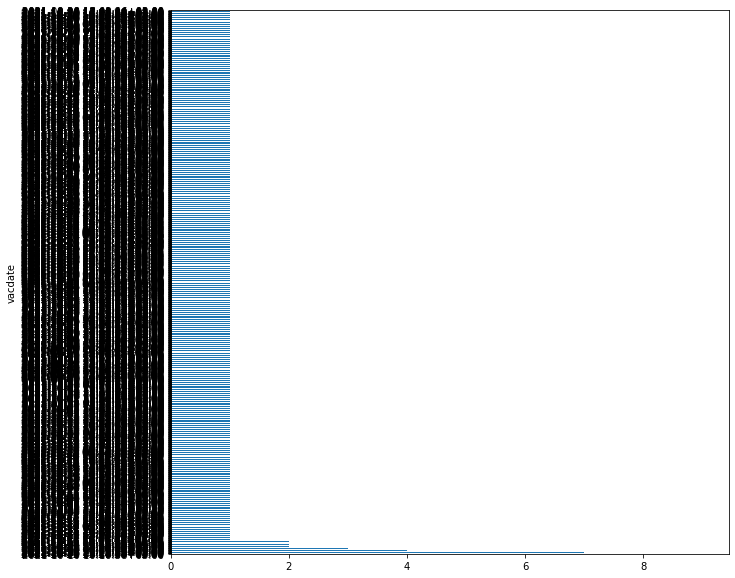

In [282]:
rcParams['figure.figsize'] = 10,10
vacs_stat.plot(kind='barh')
plt.show()

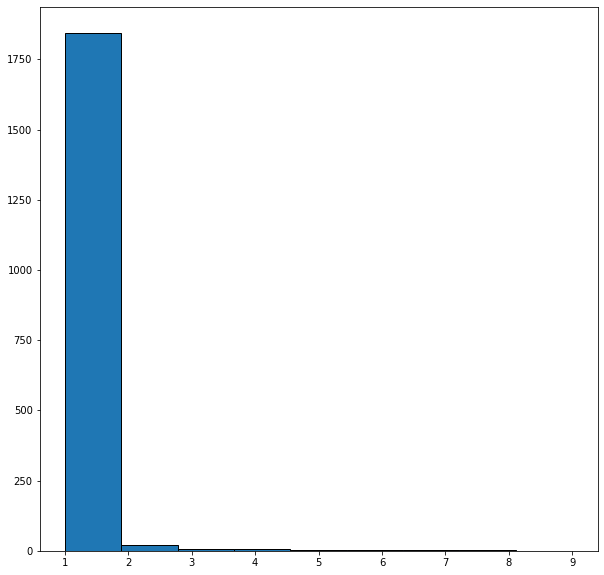

In [283]:
hist_vac = plt.hist(vacs_stat, bins=9, edgecolor='black')
plt.show()

### 6. Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий

In [ ]:
#можно исполнять после того как будет зафиксирован датафрейм. скрипт ниже - шаблон

In [207]:
import datetime

In [197]:
df_1['weekday_num'] = df_1['published_at']
df_1.weekday_num = pd.to_datetime(df_1.weekday_num)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype                                
---  ------        --------------  -----                                
 0   id            2000 non-null   object                               
 1   name          2000 non-null   object                               
 2   published_at  2000 non-null   object                               
 3   description   2000 non-null   object                               
 4   key_skills    2000 non-null   object                               
 5   weekday_num   2000 non-null   datetime64[ns, pytz.FixedOffset(180)]
dtypes: datetime64[ns, pytz.FixedOffset(180)](1), object(5)
memory usage: 93.9+ KB


In [198]:
df_1['weekday_num'] = df_1['weekday_num'].dt.day_name()

In [206]:
df_1.groupby('weekday_num')['id'].count().sort_values(ascending=False).reset_index()

,weekday_num,id
0,Monday,545
1,Wednesday,383
2,Friday,348
3,Tuesday,321
4,Thursday,320
5,Saturday,44
6,Sunday,39


### 7. Найдите те вакансии с использованием python, которые вам интересны

In [ ]:
#можно исполнять после того как будет зафиксирован датафрейм. скрипт ниже - шаблон

In [39]:
nice1 = df_1.name.str.lower().str.contains('data analyst')
nice2 = df_1.key_skills.str.lower().str.contains('python')
a = df_1[nice1 & nice2].count()
a.id

9

### 8. Определите по полю skills какие навыки больше всего востребованы для этих вакансий

In [284]:
#берем отсортированный ранее дата фрейм (поле скилс очищено от пустых значений)

df_2.head(5)

,id,name,published_at,description,key_skills,skills
0,46380141,Клиентский менеджер внешней дистрибуции (Прямы...,2021-10-14T14:48:43+0300,"<p>Хочешь работать в банке, но офисная рутина ...","Активные продажи,Работа в команде,Навыки прода...","Активные продажи,Работа в команде,Навыки прода..."
2,48160324,Менеджер службы заботы,2021-10-19T15:28:19+0300,<p>Cлужба заботы F1 отвечает за оперативную по...,"Грамотная речь,Работа в команде,Деловое общени...","Грамотная речь,Работа в команде,Деловое общени..."
5,44951547,Клиентский менеджер,2021-10-06T20:09:35+0300,"<p>Клиентский менеджер ― специалист, который п...","Активные продажи,Прямые продажи","Активные продажи,Прямые продажи"
6,49126699,Менеджер по обслуживанию,2021-10-25T17:19:22+0300,<p><strong>Если ты:</strong></p> <ul> <li>хоче...,"Работа в команде,Работа с клиентами,Консультир...","Работа в команде,Работа с клиентами,Консультир..."
7,49259518,Стажер по направлению Data Science от SBERSEASONS,2021-10-29T19:39:59+0300,<p>Любишь работать с данными и хочешь применит...,"Python,SQL,MS PowerPoint,Data Analysis","Python,SQL,MS PowerPoint,Data Analysis"


In [285]:
#делаю копии фреймов, чтобы потом не проходить по всему коду и не восстанавливать исходную таблицу, а обращаться к этой ячейке
df_3 = df_2.copy()
df_3.head()

,id,name,published_at,description,key_skills,skills
0,46380141,Клиентский менеджер внешней дистрибуции (Прямы...,2021-10-14T14:48:43+0300,"<p>Хочешь работать в банке, но офисная рутина ...","Активные продажи,Работа в команде,Навыки прода...","Активные продажи,Работа в команде,Навыки прода..."
2,48160324,Менеджер службы заботы,2021-10-19T15:28:19+0300,<p>Cлужба заботы F1 отвечает за оперативную по...,"Грамотная речь,Работа в команде,Деловое общени...","Грамотная речь,Работа в команде,Деловое общени..."
5,44951547,Клиентский менеджер,2021-10-06T20:09:35+0300,"<p>Клиентский менеджер ― специалист, который п...","Активные продажи,Прямые продажи","Активные продажи,Прямые продажи"
6,49126699,Менеджер по обслуживанию,2021-10-25T17:19:22+0300,<p><strong>Если ты:</strong></p> <ul> <li>хоче...,"Работа в команде,Работа с клиентами,Консультир...","Работа в команде,Работа с клиентами,Консультир..."
7,49259518,Стажер по направлению Data Science от SBERSEASONS,2021-10-29T19:39:59+0300,<p>Любишь работать с данными и хочешь применит...,"Python,SQL,MS PowerPoint,Data Analysis","Python,SQL,MS PowerPoint,Data Analysis"


In [ ]:
#анализ самых востребованных наборов скилов для соискателей (не самый правильный вариант, но тоже можно использовать)

In [463]:
not_true = df_3.groupby('skills')['id'].count().sort_values(ascending=False).head(10)

In [464]:
not_true

skills
Java                                                                7
Linux                                                               6
Spring Framework,Java                                               4
Spring Framework,Java,Hibernate ORM,Apache Maven,Git                3
Java,SQL,Spring Framework,Oracle Pl/SQL,Hibernate ORM               3
Ansible,Bash,Docker,Linux,Kubernetes                                2
Документальное сопровождение,Подготовка презентаций,ARIS            2
Java,Spring Framework                                               2
Hibernate ORM,Spring Framework,Java,Java EE,Docker                  2
BPMN,UML,Бизнес-анализ,Управление проектами,Atlassian Confluence    2
Name: id, dtype: int64

In [ ]:
#более правильный вариант, но не справился с тем, чтобы после того как обработаю список и уберу ковычки, перевести в нужный формат
#буду признателен ОС :)

In [455]:
skill_list = df_3.skills.unique().tolist()

In [457]:
skill_list.sort()
print(skill_list)

['.NET Framework,C#', 'ABAP,SAP,SOAP,SAP MM,Specifications,Работа с поставщиками,Бизнес-процессы,Реинжиниринг бизнес-процессов', 'API,Модульное тестирование,Agile,C#', 'ARIS,Ведение переговоров,Обучение и развитие,Материальная ответственность,Добровольное медицинское страхование,Базель2', 'ARIS,Организаторские навыки,Аналитическое мышление,MS PowerPoint,Бизнес-анализ', 'Adobe Illustrator,Adobe InDesign,Adobe Photoshop,Графический дизайн,Креативность,InDesign,Power Point,HTML,Верстка рассылок,Визуальные концепции,Оформление презентаций,баннеры,плакаты,постеры,скринсейверы', 'Adobe Illustrator,Adobe Photoshop,Adobe InDesign,Adobe After Effect,Графический дизайн', 'Adobe Illustrator,Adobe Photoshop,Графический дизайн,Графические редакторы,MS PowerPoint', 'Adobe Photoshop,Adobe Illustrator,Figma,Деловая коммуникация,Анимация', 'Adobe Photoshop,Figma,Веб-дизайн,дизайн-система', 'Adobe Photoshop,SOLID,Адекватность,Стабильность,Высокая энергичность', 'Adobe Photoshop,UML,Умение планировать,MS

In [458]:
print(len(set(skill_list)))

1035


In [459]:
type(skill_list)

list

In [460]:
data_sk = ' '.join(skill_list)
data_sk

'.NET Framework,C# ABAP,SAP,SOAP,SAP MM,Specifications,Работа с поставщиками,Бизнес-процессы,Реинжиниринг бизнес-процессов API,Модульное тестирование,Agile,C# ARIS,Ведение переговоров,Обучение и развитие,Материальная ответственность,Добровольное медицинское страхование,Базель2 ARIS,Организаторские навыки,Аналитическое мышление,MS PowerPoint,Бизнес-анализ Adobe Illustrator,Adobe InDesign,Adobe Photoshop,Графический дизайн,Креативность,InDesign,Power Point,HTML,Верстка рассылок,Визуальные концепции,Оформление презентаций,баннеры,плакаты,постеры,скринсейверы Adobe Illustrator,Adobe Photoshop,Adobe InDesign,Adobe After Effect,Графический дизайн Adobe Illustrator,Adobe Photoshop,Графический дизайн,Графические редакторы,MS PowerPoint Adobe Photoshop,Adobe Illustrator,Figma,Деловая коммуникация,Анимация Adobe Photoshop,Figma,Веб-дизайн,дизайн-система Adobe Photoshop,SOLID,Адекватность,Стабильность,Высокая энергичность Adobe Photoshop,UML,Умение планировать,MS Access,Architecture Agile Project

In [432]:
type(data_sk)

str

In [462]:
data_sk.split()

['.NET',
 'Framework,C#',
 'ABAP,SAP,SOAP,SAP',
 'MM,Specifications,Работа',
 'с',
 'поставщиками,Бизнес-процессы,Реинжиниринг',
 'бизнес-процессов',
 'API,Модульное',
 'тестирование,Agile,C#',
 'ARIS,Ведение',
 'переговоров,Обучение',
 'и',
 'развитие,Материальная',
 'ответственность,Добровольное',
 'медицинское',
 'страхование,Базель2',
 'ARIS,Организаторские',
 'навыки,Аналитическое',
 'мышление,MS',
 'PowerPoint,Бизнес-анализ',
 'Adobe',
 'Illustrator,Adobe',
 'InDesign,Adobe',
 'Photoshop,Графический',
 'дизайн,Креативность,InDesign,Power',
 'Point,HTML,Верстка',
 'рассылок,Визуальные',
 'концепции,Оформление',
 'презентаций,баннеры,плакаты,постеры,скринсейверы',
 'Adobe',
 'Illustrator,Adobe',
 'Photoshop,Adobe',
 'InDesign,Adobe',
 'After',
 'Effect,Графический',
 'дизайн',
 'Adobe',
 'Illustrator,Adobe',
 'Photoshop,Графический',
 'дизайн,Графические',
 'редакторы,MS',
 'PowerPoint',
 'Adobe',
 'Photoshop,Adobe',
 'Illustrator,Figma,Деловая',
 'коммуникация,Анимация',
 'Adobe',

### 9.Постройте график наиболее востребованных вакансий

In [402]:
cool_vac = df_1.groupby('name')['id'].count().sort_values(ascending=False).head(10)

In [403]:
cool_vac

name
Системный аналитик      36
DevOps инженер          15
Java-разработчик        14
Java разработчик        12
Frontend-разработчик    10
Java developer           9
Python разработчик       9
QA инженер               8
Java Разработчик         8
DevOps Engineer          8
Name: id, dtype: int64

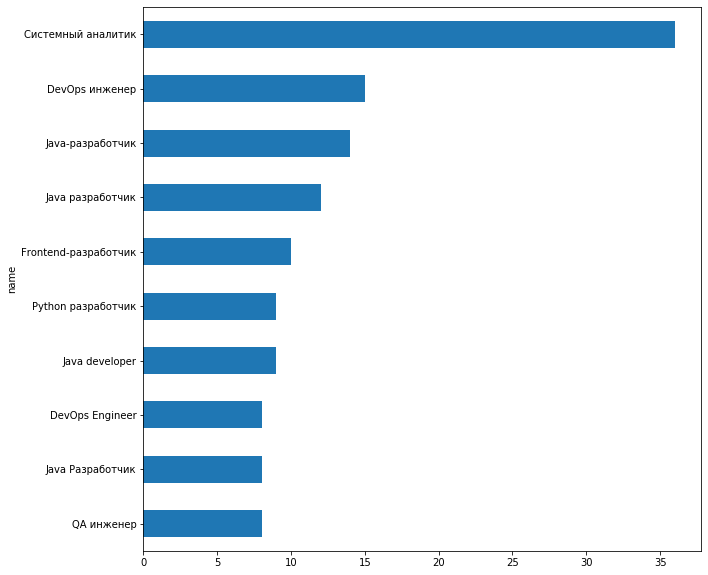

In [408]:
cool_vac.sort_values(ascending=True).plot(kind='barh')
plt.show()